# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.2 - Polynomial fit

We want now to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

We also want to explore different choices for the following parameters:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
As it is a more complex problem, we increase the number of epochs to $N_{\mathrm{epochs}}=100$ and the number of data points to $N_{\mathrm{train}}=2000$ and $N_{\mathrm{test}}=200$, while we choose a smaller noise, $\sigma=0.3$.

**Note**: the models with the different parameters were trained in in 11.2_NN_training.ipynb and saved, in order to use them here only for comparison.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.models import load_model

In [3]:
# target parameters of f(x) = a + b*x + c*x^2 + d*x^3
a = 4 
b = -3
c = -2
d = 3

def f(x):
    return a + b*x + c*x**2 + d*x**3

In [4]:
# generate training inputs
np.random.seed(0)

n_valid = 200
n_train = n_valid*10
sigma = 0.3 # noise standard deviation
n_epochs = 100

x_train = np.random.uniform(-1, 1, n_train)
x_valid = np.random.uniform(-1, 1, n_valid)
x_valid.sort()
y_target =  f(x_valid) # ideal (target) function

y_train = np.random.normal(f(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(f(x_valid), sigma)

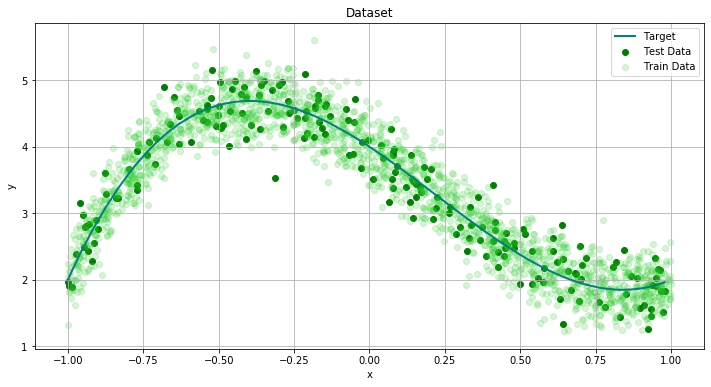

In [5]:
# plot training and target dataset
plt.figure(figsize=(12, 6))
plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.scatter(x_valid, y_valid, color='green', label='Test Data')
plt.scatter(x_train, y_train, color='limegreen', alpha=0.2, label='Train Data')
plt.title("Dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
x_predicted = np.random.uniform(-1, 1, n_valid)

As a first step, we compare fits for different models with different number of neurons $N_N$ in each layer, while keeping fixed the number of hidden layers, $N_{HL}=1$, the activation function, *selu*, the optimizer, *SGD*, and the loss function, *mse*.

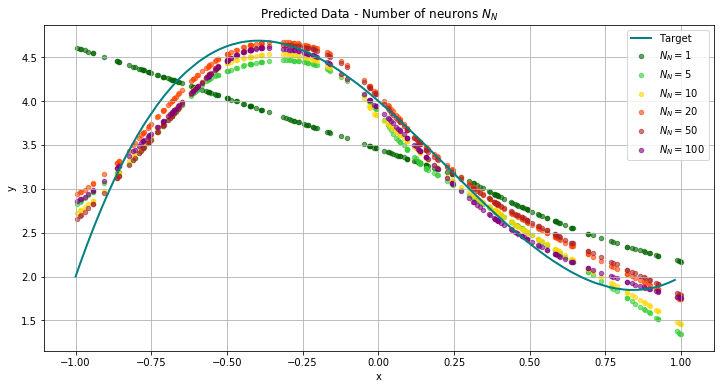

In [6]:
n_N = [1, 5, 10, 20, 50, 100]
colors=['darkgreen','limegreen', 'gold', 'orangered', 'firebrick', 'purple']
I=6

plt.figure(figsize=(12, 6))

for i in range(I):
    filename='models_11.2/N_'+str(n_N[i])
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label='$N_{N}=$'+str(n_N[i]))

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data - Number of neurons $N_N$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Then, we keep fixed $N_N=1$ and all the others parameters and we change the number of hidden layers $N_{HL}$

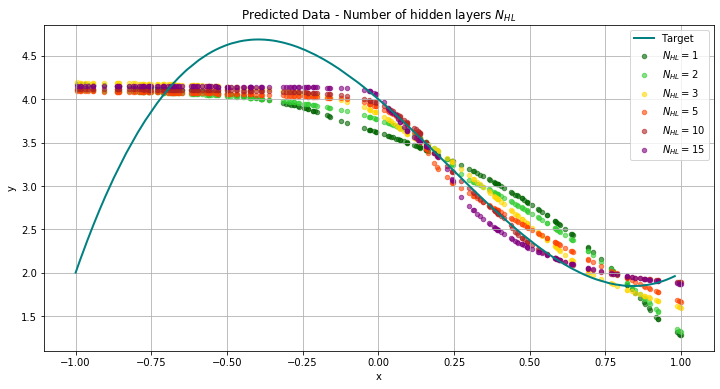

In [7]:
n_HL = [1, 2, 3, 5, 10, 15]
colors=['darkgreen','limegreen', 'gold', 'orangered', 'firebrick', 'purple']
I=6

plt.figure(figsize=(12, 6))

for i in range(I):
    filename='models_11.2/HL_'+str(n_HL[i])
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label='$N_{HL}=$'+str(n_HL[i]))

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data - Number of hidden layers $N_{HL}$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Comparing those results, we can say that it is sufficient to increase the number of neurons for each layer to obtain good results, whereas changing the number of layers leads to little improvements in the model.

Here is shown a picture of the best results for different $N_N$ and $N_{HL}$ combined.

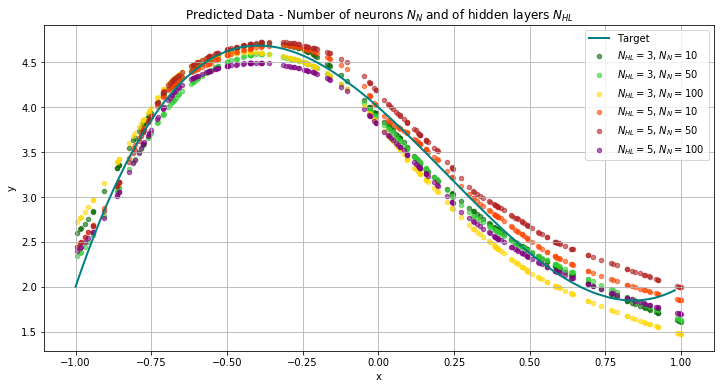

In [8]:
n_N = [10, 50, 100]
n_HL = [3, 5]
colors=[['darkgreen','limegreen', 'gold'], ['orangered', 'firebrick', 'purple']]
I=2
L=3

plt.figure(figsize=(12, 6))

for i in range(I):
    for l in range(L):
        filename='models_11.2/HL_'+str(n_HL[i])+'_N_'+str(n_N[l])
        model=load_model(filename)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted, color=colors[i][l], alpha=0.6, s=20, label='$N_{HL}=$'+str(n_HL[i])+', $N_{N}=$'+str(n_N[l]))

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data - Number of neurons $N_N$ and of hidden layers $N_{HL}$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Now we keep all the parameters fixed and we compare results for different activation functions: *sigmoid*, *tanh*, *elu*, *relu*, *selu*.

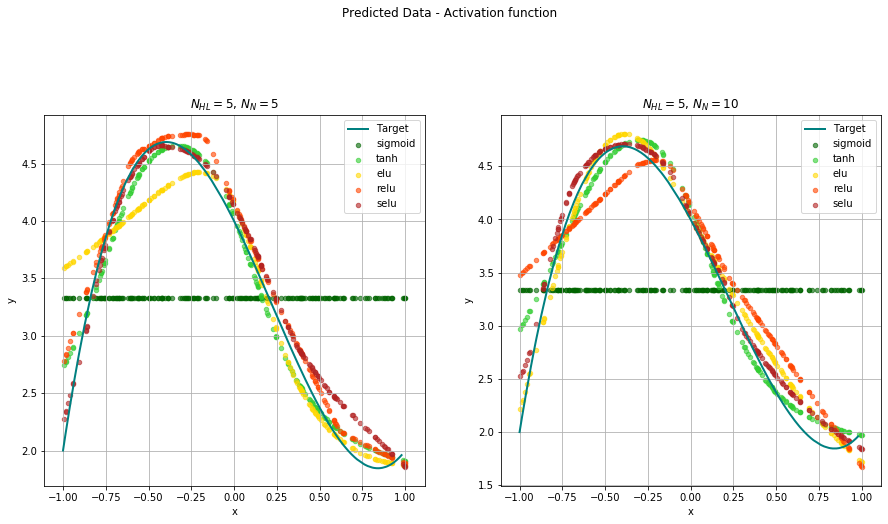

In [9]:
activ=['sigmoid', 'tanh', 'elu', 'relu', 'selu']
colors=['darkgreen','limegreen', 'gold', 'orangered', 'firebrick']
I=5

plt.figure(figsize=(15, 15))
plt.suptitle('Predicted Data - Activation function')

plt.subplot(221)
for i in range(I):
    filename='models_11.2/HL_5_N_5_act_'+activ[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=activ[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=5$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
 
plt.subplot(222)  
for i in range(I):
    filename='models_11.2/HL_5_N_10_act_'+activ[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=activ[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=10$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Those leading to the best results are *tanh* and *selu*.

We then test different optimizers: *SGD*, *RMSprop*, *Adagrad* and *Adam*.

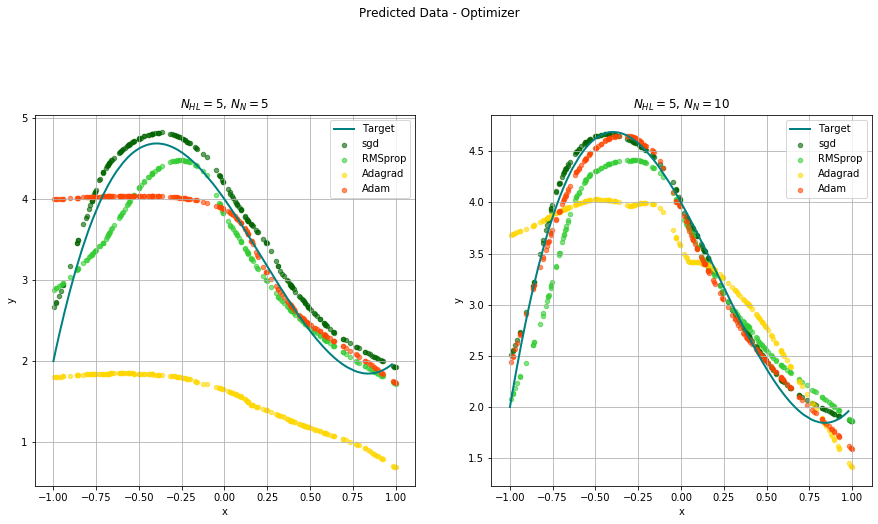

In [10]:
opt=['sgd', 'RMSprop', 'Adagrad', 'Adam']
colors=['darkgreen','limegreen', 'gold', 'orangered']
I=4

plt.figure(figsize=(15, 15))
plt.suptitle('Predicted Data - Optimizer')

plt.subplot(221)
for i in range(I):
    filename='models_11.2/HL_5_N_5_opt_'+opt[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=opt[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=5$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(222)
for i in range(I):
    filename='models_11.2/HL_5_N_10_opt_'+opt[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=opt[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=10$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The optimizer that gives the best results is *sgd*, but also *Adam* is a good choice if the number of neurons in each layer is increased.

We now show results of fitting with models with different loss functions: *mse*, *mae*, *msle*, *logcosh*, *poisson*.

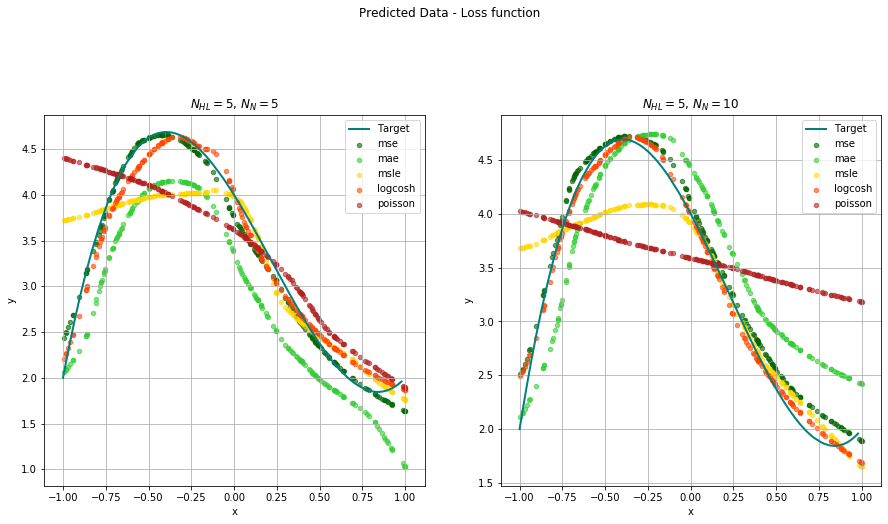

In [11]:
lo=['mse','mae','msle', 'logcosh', 'poisson']
colors=['darkgreen','limegreen', 'gold', 'orangered', 'firebrick']
I=5

plt.figure(figsize=(15, 15))
plt.suptitle('Predicted Data - Loss function')

plt.subplot(221)
for i in range(I):
    filename='models_11.2/HL_5_N_5_lo_'+lo[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=lo[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=5$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(222)
for i in range(I):
    filename='models_11.2/HL_5_N_10_lo_'+lo[i]
    model=load_model(filename)
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=lo[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("$N_{HL}=5$, $N_N=10$")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

The best loss function for this task are *mse* and *logcosh*.

Finally, we picture the fits for different models with combinations of the best parameters and we look at their performances.

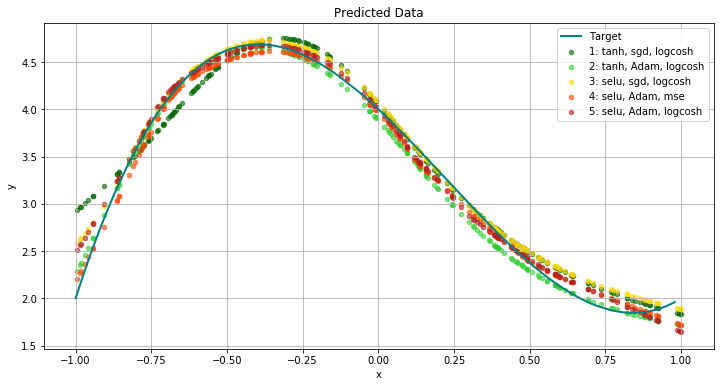


 1: tanh, sgd, logcosh

– Test loss: 0.05830524116754532
– Test accuracy: 0.12461873888969421 

– Number of parameters: 4741 

*******************************************

 2: tanh, Adam, logcosh

– Test loss: 0.04752451926469803
– Test accuracy: 0.09952802956104279 

– Number of parameters: 12901 

*******************************************

 3: selu, sgd, logcosh

– Test loss: 0.04934132471680641
– Test accuracy: 0.10377459228038788 

– Number of parameters: 2881 

*******************************************

 4: selu, Adam, mse

– Test loss: 0.0950494259595871
– Test accuracy: 0.0950494259595871 

– Number of parameters: 4741 

*******************************************

 5: selu, Adam, logcosh

– Test loss: 0.0467240996658802
– Test accuracy: 0.0978638231754303 

– Number of parameters: 7801 

*******************************************


In [8]:
filenames=['models_11.2/HL_5_N_30_act_tanh_opt_sgd_lo_logcosh',
           'models_11.2/HL_5_N_50_act_tanh_opt_Adam_lo_logcosh',
           'models_11.2/HL_3_N_30_act_selu_opt_sgd_lo_logcosh',
           'models_11.2/HL_5_N_30_act_selu_opt_Adam_lo_mse',
           'models_11.2/HL_3_N_50_act_selu_opt_Adam_lo_logcosh']

labels=['1: tanh, sgd, logcosh',
        '2: tanh, Adam, logcosh',
        '3: selu, sgd, logcosh',
        '4: selu, Adam, mse',
        '5: selu, Adam, logcosh']

colors=['darkgreen','limegreen', 'gold', 'orangered','firebrick', 'purple']

scores=[]
parameters=[]

plt.figure(figsize=(12, 6))

I=5
for i in range(I):
    model=load_model(filenames[i])
    
    scores.append(model.evaluate(x_valid, y_valid, batch_size=32, verbose=0))
    parameters.append(model.count_params())
    
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=labels[i])

plt.plot(x_valid, y_target, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


for i in range(I):
    print('\n',labels[i])
    print('\n– Test loss:', scores[i][0])
    print('– Test accuracy:', scores[i][1], '\n')
    print('– Number of parameters:', parameters[i], '\n')
    print('*******************************************')

From this last comparison, we can say that the best model at fitting the function is the last one, with the following parameters:

- $N_{HL}=3$
- $N_N=50$
- activation function: *selu*
- optimizer: *Adam*
- loss function: *logcosh*

Also the third one gives good performance results, and moreover works with less parameters. This make us conclude that it is not necessary the complexity of the model that makes it perform well, but a good calibration of the model's parameters does.

If we try to fit the function out of the range the model was trained on, we see that any of the precedent models has very bad performances:

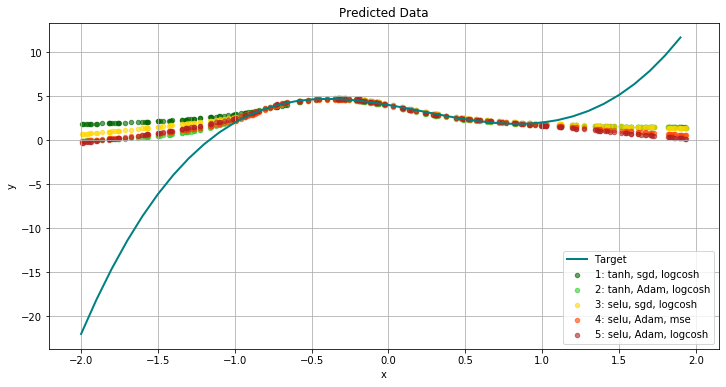

In [9]:
filenames=['models_11.2/HL_5_N_30_act_tanh_opt_sgd_lo_logcosh',
           'models_11.2/HL_5_N_50_act_tanh_opt_Adam_lo_logcosh',
           'models_11.2/HL_3_N_30_act_selu_opt_sgd_lo_logcosh',
           'models_11.2/HL_5_N_30_act_selu_opt_Adam_lo_mse',
           'models_11.2/HL_3_N_50_act_selu_opt_Adam_lo_logcosh']

labels=['1: tanh, sgd, logcosh',
        '2: tanh, Adam, logcosh',
        '3: selu, sgd, logcosh',
        '4: selu, Adam, mse',
        '5: selu, Adam, logcosh']

colors=['darkgreen','limegreen', 'gold', 'orangered','firebrick', 'purple']

x_predicted = np.random.uniform(-2, 2, n_valid)
x_out=np.arange(-2, 2, 0.1)
y_out=f(x_out)
    
plt.figure(figsize=(12, 6))

I=5
for i in range(I):
    model=load_model(filenames[i])
    y_predicted = model.predict(x_predicted)
    plt.scatter(x_predicted, y_predicted, color=colors[i], alpha=0.6, s=20, label=labels[i])

plt.plot(x_out, y_out, color='teal', label="Target", linewidth='2')
plt.title("Predicted Data")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Thus, the models have the ability to predict well only the data inside the boudaries where they were trained.